k sources, l rounds (k <= l)

Li: 除去 i - 1 round leaves后剩下的node i<= l
Bi: 距离burned过的nodes为1的nodes

R1 = L1/B1 
...
Rl = Ll/Bl


get matrix, k , l
S0: initialize Ri by Li


In [1]:
import networkx as nx
from numpy.linalg import matrix_power
import numpy as np
import matplotlib.pyplot as plt
import copy as cp

#### 0 transfrom

In [3]:
#generate
g = nx.random_tree(20)
# to adj matrix
A = nx.adjacency_matrix(g)
A = A.todense()
A = np.array(A)

## S0: build graph

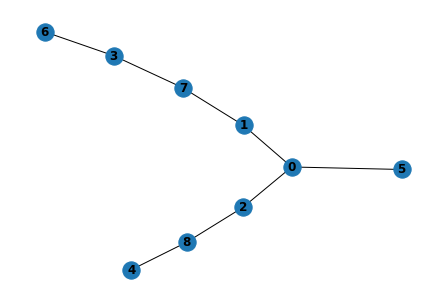

In [2]:
# generate
N = 9
g = nx.random_tree(N)
g_copy = cp.deepcopy(g)
# draw 
nx.draw(g, with_labels=True, font_weight='bold')
plt.show()

## S1.1 Initialize Llist

In [3]:
k = 3
l = 3
#1. list detect whether all nodes are visited

L_list = []
'''
notimportant = range(N)
L_list.append(notimportant)
L_list
'''

'\nnotimportant = range(N)\nL_list.append(notimportant)\nL_list\n'

## S1.2 makeLL

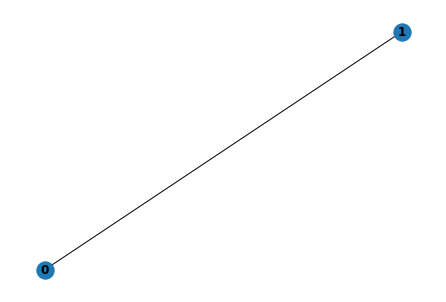

' '

In [4]:
def updateL(input, g):
    '''
    input: all vertex this level 
    1. get all leaves
    2. delete all leaves
    '''
    #S1 get all leaves
    temp = [x for x in g.nodes() if g.degree(x)==1]
    #S2.1 remove leaves from graph
    for i in range(len(temp)):
        g.remove_node(temp[i])
    #S2.2 return all non-leaves 
    return [x for x in input if x not in temp]


g = cp.deepcopy(g_copy) #0 copy original graph
initial = range(N) 
for i in range(l): # who decide rounds??: l
    leaves = updateL(initial, g) #get leaves left over
    initial = cp.deepcopy(leaves)
    
    L_list.append(initial)
    #print(leaves, len(leaves))
L_list
''' '''#uncomment to show process graphs
nx.draw(g, with_labels=True, font_weight='bold')
plt.show()
''' '''

In [6]:
# reverse so the order is: 1st source, 2nd source, ... , kth source
L_list.reverse()
L_list


[[0, 1, 2, 3, 7, 8], [0, 1, 2, 7], [0, 1]]

## S2.0 initialize R and source

In [7]:
'''
1.source：
每当找到一个source， 就更新里面的数值； 如果全burn了， 就返回source 因为他就是burning sequence
tip： 设计一个best sequence（最短的），不能burn了返回
2. visited：这个图的每个node有没有被burn（也可以不用）
 0: visited; 1: unvisited 
'''
source = -1*np.ones(k)
visited = np.ones([N]) # 0: visited; 1: unvisited 
source

array([-1., -1., -1.])

## S2.1 update R[i+1] based on R[i]

In [8]:


#get B 
def findB(burned, gg):
    '''
    burned: burned nodes in the last round； 截至到上一回合，已经被burn的nodes， 应该是list进来
    gg: graph 我们的总图
    '''
    nodes_toremove = cp.copy(burned)
    # find all bunred vertice's neignbors
    for i in range(burned):
        nb_of_source = nx.all_neighbors(gg, burned[i])
        
        for x in nb_of_source:
            if x not in nodes_toremove: # keep unique
                nodes_toremove.append(x)
    
    return nodes_toremove #返回B set


In [26]:

#S1 initialize
R_dynamic = [cp.copy(L_list[0])] # list for dynamic R
Mark = [np.ones(len(L_list[0]))] # visited signal of dynamic R

bestsequence = source# need update
g2 = cp.copy(g_copy) #复制一份原图，专门来用
burned = []
def updateR(num):
    # judge and recursion
    if sum(Mark[num]) == 0:
        if i == 0: 
            return bestsequence
        else:
            Mark.remove(Mark[num])
            R_dynamic.remove(R_dynamic[num])
            updateR(num - 1)
  
    # pick burn and remove 
    source[num] = R_dynamic[num][0]
    burned.append(source[num])
    Mark[num][0] = 0 #??
    R_dynamic.remove(R_dynamic[num][0])
    
    # update R
    B = findB(burned, g2)
    temp = [node for node in L_list[num] if node not in B]
    R_dynamic.append(temp)
    #Mark.append(np.ones(len(temp)))
    
    # to next level
    if num < k - 1: 
        updateR(num + 1)
    

while len(R_dynamic[k - 1]) != 0:
    source[k - 1] = R_dynamic[k - 1][0] # pick
    burned.append(source[k-1])
    R_dynamic[k-1].remove(R_dynamic[k - 1][0]) #remove
    
    if len(burned) == N:
        print(source)
    burned.remove(source[k-1])    
         
    
'''
     if len(R_dynamic[num]) == 0:
        if i == 0: 
            return bestsequence
        else:
            Mark.remove(Mark[num])
            R_dynamic.remove(R_dynamic[num])
            updateR(num - 1)
    
 '''     

IndexError: list index out of range


for col in range(k):#col traversal
    
    if R_dynamic[0] == []:
        continue
    source[k] = L_list[k][0]
    
#initialize source1
source[0] = L_list[0][0] #record source1
Mark[0][0] = 0 #visit source1
R_dynamic[0].remove(source[0]) #remove

g2 = cp.copy(g_copy) #复制一份原图，专门来用
B = findB(source[0], g2)
R_dynamic.append([node for node in L_list[1] if node not in B])
#for i in range(k):
    

'''
for i in range(k): #pick k sources
    for j in range(R_list[i]):
'''  
    
print(source, Mark, B)
R_dynamic